In [ ]:
#Name : Aryan Tamboli
#PRN : 202201040088
#Feature engineering
#Project Topic : Air Quality index Prediction :


In [ ]:
#Feature Engineering Techniques with Python
#Data compatible with the machine learning algorithm
#Machine learning algorithms sometimes expect data formatted in a certain way
#Data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

#Feature Engineering Techniques with Python
#Data compatible with the machine learning algorithm
#Machine learning algorithms sometimes expect data formatted in a certain way
#Data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# loading dataset
dataset = pd.read_csv(r'/content/city_day.csv')
print(dataset)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [ ]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
print(dataset.isnull().sum())


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
file_path = '/content/city_day.csv'
data = pd.read_csv(file_path)

# Handling Missing Values

# Impute numerical columns with the mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
data[num_cols] = imputer_num.fit_transform(data[num_cols])

# Impute categorical columns with the most frequent value (mode)
cat_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

# Handling Categorical Features

# One-hot encode the 'City' column
data = pd.get_dummies(data, columns=['City'], drop_first=True)

# Label encode the 'AQI_Bucket' column (since AQI categories may have some order)
label_encoder = LabelEncoder()
data['AQI_Bucket'] = label_encoder.fit_transform(data['AQI_Bucket'])

# Display the cleaned dataset
print(data.head())


         Date      PM2.5        PM10     NO    NO2    NOx        NH3     CO  \
0  2015-01-01  67.450578  118.127103   0.92  18.22  17.15  23.483476   0.92   
1  2015-01-02  67.450578  118.127103   0.97  15.69  16.46  23.483476   0.97   
2  2015-01-03  67.450578  118.127103  17.40  19.30  29.70  23.483476  17.40   
3  2015-01-04  67.450578  118.127103   1.70  18.48  17.97  23.483476   1.70   
4  2015-01-05  67.450578  118.127103  22.10  21.42  37.76  23.483476  22.10   

     SO2      O3  ...  City_Jorapokhar  City_Kochi  City_Kolkata  \
0  27.64  133.36  ...            False       False         False   
1  24.55   34.06  ...            False       False         False   
2  29.07   30.70  ...            False       False         False   
3  18.59   36.08  ...            False       False         False   
4  39.33   39.31  ...            False       False         False   

   City_Lucknow  City_Mumbai  City_Patna  City_Shillong  City_Talcher  \
0         False        False       False   

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/city_day.csv'
dataset = pd.read_csv(file_path)

# Imputation for Numerical Columns: Fill missing values with the mean of the column
dataset['PM2.5'].fillna(dataset['PM2.5'].mean(), inplace=True)
dataset['PM10'].fillna(dataset['PM10'].mean(), inplace=True)
dataset['NO'].fillna(dataset['NO'].mean(), inplace=True)
dataset['NO2'].fillna(dataset['NO2'].mean(), inplace=True)
dataset['NOx'].fillna(dataset['NOx'].mean(), inplace=True)
dataset['NH3'].fillna(dataset['NH3'].mean(), inplace=True)
dataset['CO'].fillna(dataset['CO'].mean(), inplace=True)
dataset['SO2'].fillna(dataset['SO2'].mean(), inplace=True)
dataset['O3'].fillna(dataset['O3'].mean(), inplace=True)
dataset['Benzene'].fillna(dataset['Benzene'].mean(), inplace=True)
dataset['Toluene'].fillna(dataset['Toluene'].mean(), inplace=True)
dataset['Xylene'].fillna(dataset['Xylene'].mean(), inplace=True)
dataset['AQI'].fillna(dataset['AQI'].mean(), inplace=True)

# Imputation for Categorical Columns: Fill missing values with the most frequent value
dataset['City'].fillna(dataset['City'].mode()[0], inplace=True)
dataset['AQI_Bucket'].fillna(dataset['AQI_Bucket'].mode()[0], inplace=True)

# Print dataset to verify
print(dataset.head())

        City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.06     3.68     5.50    3.77  166.463581   
2  23.483476  17.40  29.07   30.70     6.80    16.40    2.25  166.463581   
3  23.483476   1.70  18.59   36.08     4.43    10.14    1.00  166.463581   
4  23.483476  22.10  39.33   39.31     7.01    18.89    2.78  166.463581   

  AQI_Bucket  
0   Moderate  
1   Moderate  
2   Moderate  
3   Moderate  
4   Moderate  


<ipython-input-6-8ce130856975>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PM2.5'].fillna(dataset['PM2.5'].mean(), inplace=True)
<ipython-input-6-8ce130856975>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
print(dataset.isnull().sum())



City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [ ]:
print(dataset.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [ ]:
dataset.to_csv('/content/cleaned_city_day.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Define invalid value conditions for air quality data

# Replace negative values with NaN (as negative concentrations are invalid)
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Replace negative values in pollutant columns with NaN
for col in pollutant_cols:
    dataset[col] = dataset[col].apply(lambda x: np.nan if x < 0 else x)

# Optionally, replace very high values with NaN if they exceed a reasonable threshold
# For example, replace 'PM2.5' values higher than 1000 with NaN (depending on the context of your data)
dataset['PM2.5'] = dataset['PM2.5'].apply(lambda x: np.nan if x > 1000 else x)

# Handle invalid values for categorical columns like 'City' or 'AQI_Bucket'
# Check if the 'City' column has any invalid or unknown values (e.g., an empty or unknown string)
dataset['City'] = dataset['City'].replace("", np.nan)

# Handle categorical values in 'AQI_Bucket' (ensure valid AQI categories)
valid_aqi_buckets = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
dataset['AQI_Bucket'] = dataset['AQI_Bucket'].apply(lambda x: x if x in valid_aqi_buckets else np.nan)

# Imputation: fill missing values (NaN) created by invalid value replacements
# Impute numerical columns with mean
for col in pollutant_cols:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

# Impute categorical columns with the mode
dataset['City'].fillna(dataset['City'].mode()[0], inplace=True)
dataset['AQI_Bucket'].fillna(dataset['AQI_Bucket'].mode()[0], inplace=True)

# Display the cleaned dataset
print(dataset.head())


        City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.06     3.68     5.50    3.77  166.463581   
2  23.483476  17.40  29.07   30.70     6.80    16.40    2.25  166.463581   
3  23.483476   1.70  18.59   36.08     4.43    10.14    1.00  166.463581   
4  23.483476  22.10  39.33   39.31     7.01    18.89    2.78  166.463581   

  AQI_Bucket  
0   Moderate  
1   Moderate  
2   Moderate  
3   Moderate  
4   Moderate  


<ipython-input-10-5323e2962538>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)
<ipython-input-10-5323e2962538>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
###########################Categorical Encoding#####################################
#Categorical Encoding
#Discrete values and represent some sort of category or class
#Direct support to categorical variables without further manipulation, but some ML Algorithms does not support
dataset.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
#Categorical encoding

import pandas as pd

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Convert relevant columns to 'category' data type
dataset["City"] = dataset["City"].astype('category')
dataset["AQI_Bucket"] = dataset["AQI_Bucket"].astype('category')

# Display the data types of all columns
print(dataset.dtypes)

# Show the first few rows to see the changes
print(dataset.head())


City          category
Date            object
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Benzene        float64
Toluene        float64
Xylene         float64
AQI            float64
AQI_Bucket    category
dtype: object
        City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.0

In [ ]:
#Label encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns that need label encoding
categorical_columns = ['City', 'AQI_Bucket']

# Apply Label Encoding to the categorical columns
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Display the first few rows of the dataset after encoding
print(dataset.head())

# Display the mappings for City and AQI_Bucket
for col in categorical_columns:
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Label encoding for {col}: {label_mapping}")


   City        Date      PM2.5        PM10     NO    NO2    NOx        NH3  \
0     0  2015-01-01  67.450578  118.127103   0.92  18.22  17.15  23.483476   
1     0  2015-01-02  67.450578  118.127103   0.97  15.69  16.46  23.483476   
2     0  2015-01-03  67.450578  118.127103  17.40  19.30  29.70  23.483476   
3     0  2015-01-04  67.450578  118.127103   1.70  18.48  17.97  23.483476   
4     0  2015-01-05  67.450578  118.127103  22.10  21.42  37.76  23.483476   

      CO    SO2      O3  Benzene  Toluene  Xylene         AQI  AQI_Bucket  
0   0.92  27.64  133.36     0.00     0.02    0.00  166.463581           1  
1   0.97  24.55   34.06     3.68     5.50    3.77  166.463581           1  
2  17.40  29.07   30.70     6.80    16.40    2.25  166.463581           1  
3   1.70  18.59   36.08     4.43    10.14    1.00  166.463581           1  
4  22.10  39.33   39.31     7.01    18.89    2.78  166.463581           1  
Label encoding for City: {'Good': 0, 'Moderate': 1, 'Poor': 2, 'Satisfactor

In [ ]:
#Categorical encoding

import pandas as pd

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Identify the categorical columns that require One-Hot Encoding
categorical_columns = ['City', 'AQI_Bucket']

# Apply One-Hot Encoding
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns)

# Display the first few rows of the dataset after One-Hot Encoding
print(dataset_encoded.head())

# Show the column names to check the newly created binary columns
print(dataset_encoded.columns)


         Date      PM2.5        PM10     NO    NO2    NOx        NH3     CO  \
0  2015-01-01  67.450578  118.127103   0.92  18.22  17.15  23.483476   0.92   
1  2015-01-02  67.450578  118.127103   0.97  15.69  16.46  23.483476   0.97   
2  2015-01-03  67.450578  118.127103  17.40  19.30  29.70  23.483476  17.40   
3  2015-01-04  67.450578  118.127103   1.70  18.48  17.97  23.483476   1.70   
4  2015-01-05  67.450578  118.127103  22.10  21.42  37.76  23.483476  22.10   

     SO2      O3  ...  City_Shillong  City_Talcher  City_Thiruvananthapuram  \
0  27.64  133.36  ...          False         False                    False   
1  24.55   34.06  ...          False         False                    False   
2  29.07   30.70  ...          False         False                    False   
3  18.59   36.08  ...          False         False                    False   
4  39.33   39.31  ...          False         False                    False   

   City_Visakhapatnam  AQI_Bucket_Good  AQI_Bucket

In [ ]:
# Count Encoding

import pandas as pd

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Count Encoding for 'City' column
city_count = dataset['City'].value_counts()
dataset['City_Count_Encoded'] = dataset['City'].map(city_count)

# Count Encoding for 'AQI_Bucket' column
aqi_bucket_count = dataset['AQI_Bucket'].value_counts()
dataset['AQI_Bucket_Count_Encoded'] = dataset['AQI_Bucket'].map(aqi_bucket_count)

# Show the dataset with the count encoded columns
print(dataset[['City', 'City_Count_Encoded', 'AQI_Bucket', 'AQI_Bucket_Count_Encoded']].head())


        City  City_Count_Encoded AQI_Bucket  AQI_Bucket_Count_Encoded
0  Ahmedabad                2009   Moderate                     13510
1  Ahmedabad                2009   Moderate                     13510
2  Ahmedabad                2009   Moderate                     13510
3  Ahmedabad                2009   Moderate                     13510
4  Ahmedabad                2009   Moderate                     13510


<ipython-input-16-06f1a021491c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=dataset, y="PM2.5", x="City", orient="v", ax=axes[0], palette="Oranges")
<ipython-input-16-06f1a021491c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=dataset, y="PM10", x="City", orient="v", ax=axes[1], palette="Oranges")
<ipython-input-16-06f1a021491c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=dataset, y="NO2", x="City", orient="v", ax=axes[2], palette="Oranges")
<ipython-input-16-06f1a021491c>:23: FutureWarning: 

Passing `palette` wi

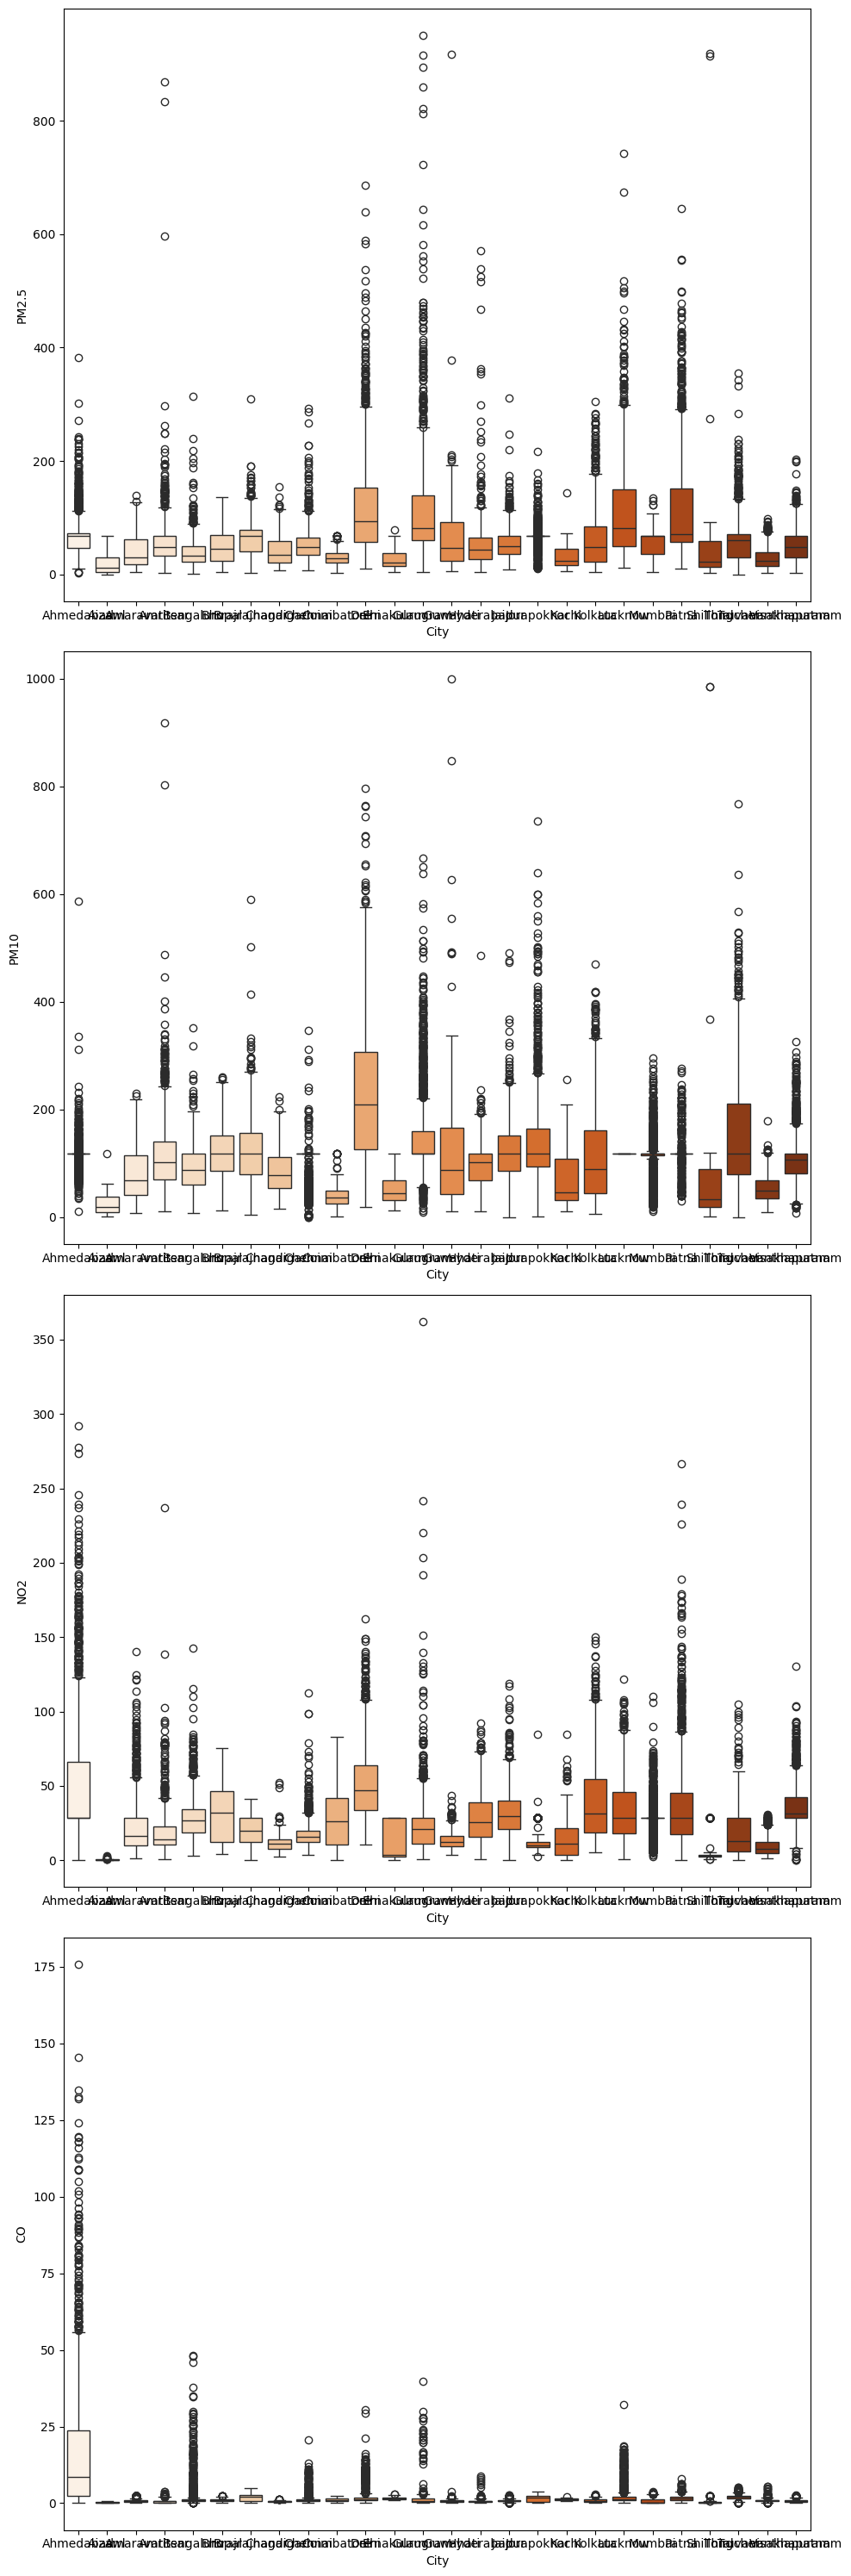

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Create subplots with 4 rows and 1 column
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(10, 30)

# Boxplot for PM2.5 vs City
sb.boxplot(data=dataset, y="PM2.5", x="City", orient="v", ax=axes[0], palette="Oranges")

# Boxplot for PM10 vs City
sb.boxplot(data=dataset, y="PM10", x="City", orient="v", ax=axes[1], palette="Oranges")

# Boxplot for NO2 vs City
sb.boxplot(data=dataset, y="NO2", x="City", orient="v", ax=axes[2], palette="Oranges")

# Boxplot for CO vs City
sb.boxplot(data=dataset, y="CO", x="City", orient="v", ax=axes[3], palette="Oranges")

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# Set the factor for determining outliers
factor = 2

# Outlier detection for the 'PM2.5' column
upper_lim_PM25 = dataset['PM2.5'].mean() + dataset['PM2.5'].std() * factor
lower_lim_PM25 = dataset['PM2.5'].mean() - dataset['PM2.5'].std() * factor

# Remove outliers in 'PM2.5'
no_outliers_PM25 = dataset[(dataset['PM2.5'] < upper_lim_PM25) & (dataset['PM2.5'] > lower_lim_PM25)]

# Detect upper outliers
outliers_u_PM25 = dataset[dataset['PM2.5'] > upper_lim_PM25]

# Detect lower outliers
outliers_l_PM25 = dataset[dataset['PM2.5'] < lower_lim_PM25]

# Print the limits and results
print("Upper Limit for PM2.5: ", upper_lim_PM25)
print("Lower Limit for PM2.5: ", lower_lim_PM25)

# Show data without outliers
print("\nData without outliers in PM2.5:\n", no_outliers_PM25.head())

# Show upper outliers
print("\nUpper Outliers in PM2.5:\n", outliers_u_PM25.head())

# Show lower outliers
print("\nLower Outliers in PM2.5:\n", outliers_l_PM25.head())

# Repeat similar operations for 'PM10', 'NO2', etc.


Upper Limit for PM2.5:  186.27952993189658
Lower Limit for PM2.5:  -51.378374034090456

Data without outliers in PM2.5:
         City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.06     3.68     5.50    3.77  166.463581   
2  23.483476  17.40  29.07   30.70     6.80    16.40    2.25  166.463581   
3  23.483476   1.70  18.59   36.08     4.43    10.14    1.00  166.463581   
4  23.483476  22.10  39.33   39.31     7.01    18.89    2.78  166.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# List of features to be scaled (numerical features from your dataset)
features_to_scale = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']

# Create a copy of the dataset for scaled data
scaled_data = dataset.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Perform scaling on the selected features
scaled_data[features_to_scale] = standard_scaler.fit_transform(scaled_data[features_to_scale])

# Display the mean and standard deviation of the scaled data for the 'PM2.5' column as an example
print('Scaled Data for PM2.5 (first 5 rows):\n', scaled_data['PM2.5'].head())
print('Mean of scaled PM2.5:', scaled_data['PM2.5'].mean())
print('Standard Deviation of scaled PM2.5:', scaled_data['PM2.5'].std())

# You can check the scaled values for other features similarly:
print('Scaled Data for PM10 (first 5 rows):\n', scaled_data['PM10'].head())
print('Mean of scaled PM10:', scaled_data['PM10'].mean())
print('Standard Deviation of scaled PM10:', scaled_data['PM10'].std())


Scaled Data for PM2.5 (first 5 rows):
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: PM2.5, dtype: float64
Mean of scaled PM2.5: -7.699491227633066e-18
Standard Deviation of scaled PM2.5: 1.0000169317902852
Scaled Data for PM10 (first 5 rows):
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: PM10, dtype: float64
Mean of scaled PM10: 0.0
Standard Deviation of scaled PM10: 1.000016931790282


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/cleaned_city_day.csv'
dataset = pd.read_csv(file_path)

# List of features to apply log transformation (numerical features from your dataset)
features_to_log_transform = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']

# Create a copy of the dataset for log-transformed data
log_transformed_data = dataset.copy()

# Ensure all values are positive by adding a small constant (1) to avoid log(0) issues
log_transformed_data[features_to_log_transform] = log_transformed_data[features_to_log_transform].apply(lambda x: np.log(x + 1))

# Display the log-transformed data for 'PM2.5' as an example
print('Log-transformed data for PM2.5 (first 5 rows):\n', log_transformed_data['PM2.5'].head())

# You can check the log-transformed values for other features similarly:
print('Log-transformed data for PM10 (first 5 rows):\n', log_transformed_data['PM10'].head())


Log-transformed data for PM2.5 (first 5 rows):
 0    4.226112
1    4.226112
2    4.226112
3    4.226112
4    4.226112
Name: PM2.5, dtype: float64
Log-transformed data for PM10 (first 5 rows):
 0    4.780191
1    4.780191
2    4.780191
3    4.780191
4    4.780191
Name: PM10, dtype: float64


First five rows:
        City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.06     3.68     5.50    3.77  166.463581   
2  23.483476  17.40  29.07   30.70     6.80    16.40    2.25  166.463581   
3  23.483476   1.70  18.59   36.08     4.43    10.14    1.00  166.463581   
4  23.483476  22.10  39.33   39.31     7.01    18.89    2.78  166.463581   

  AQI_Bucket  
0   Moderate  
1   Moderate  
2   Moderate  
3   Moderate  
4   Moderate  

Su

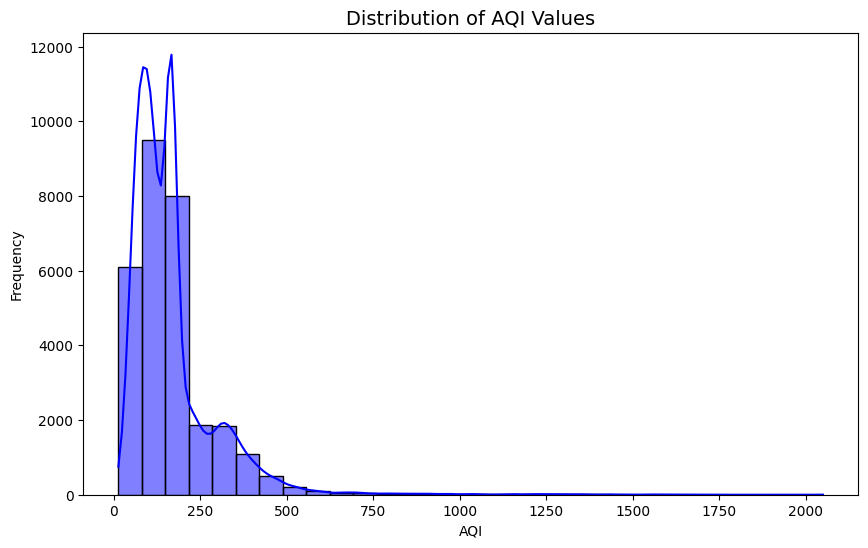

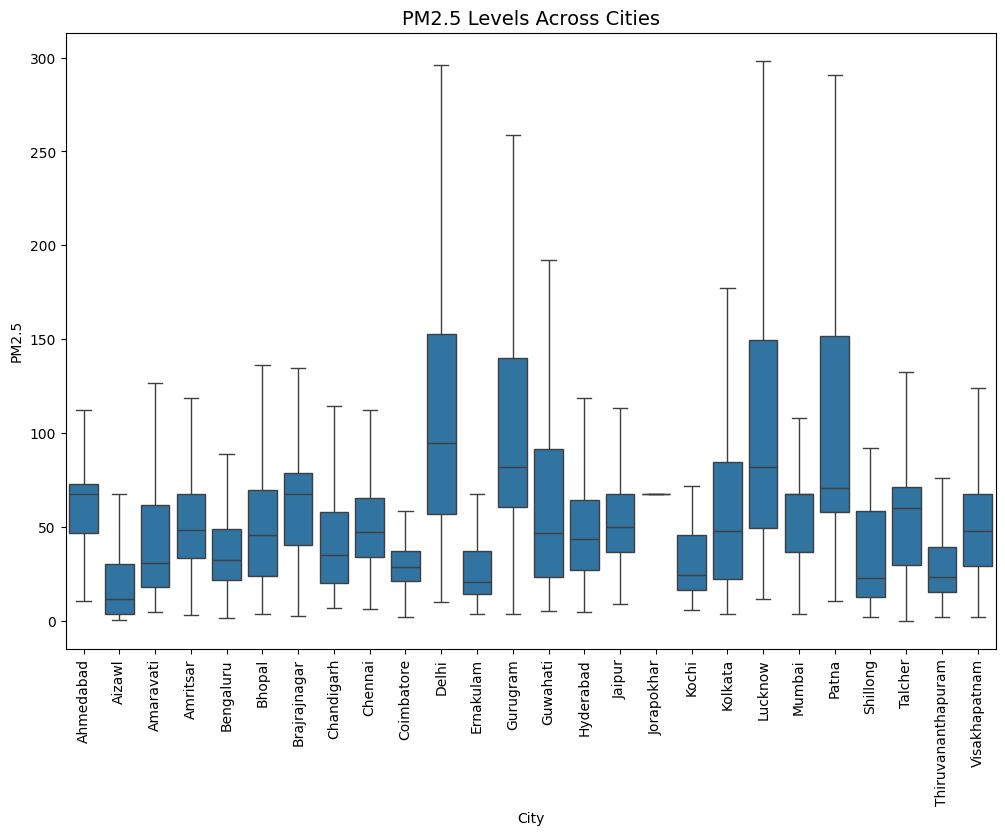

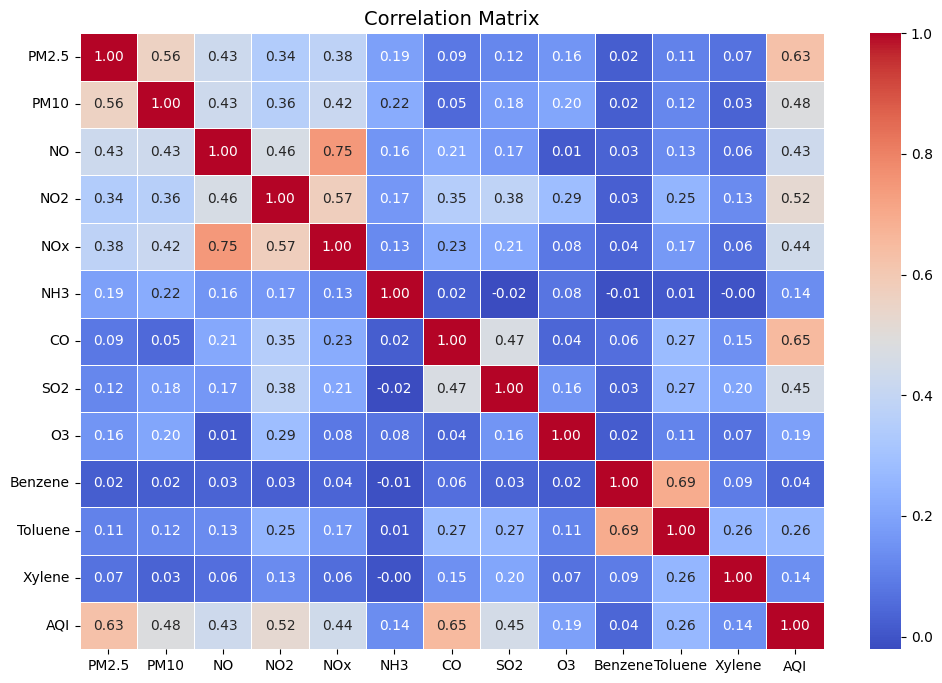

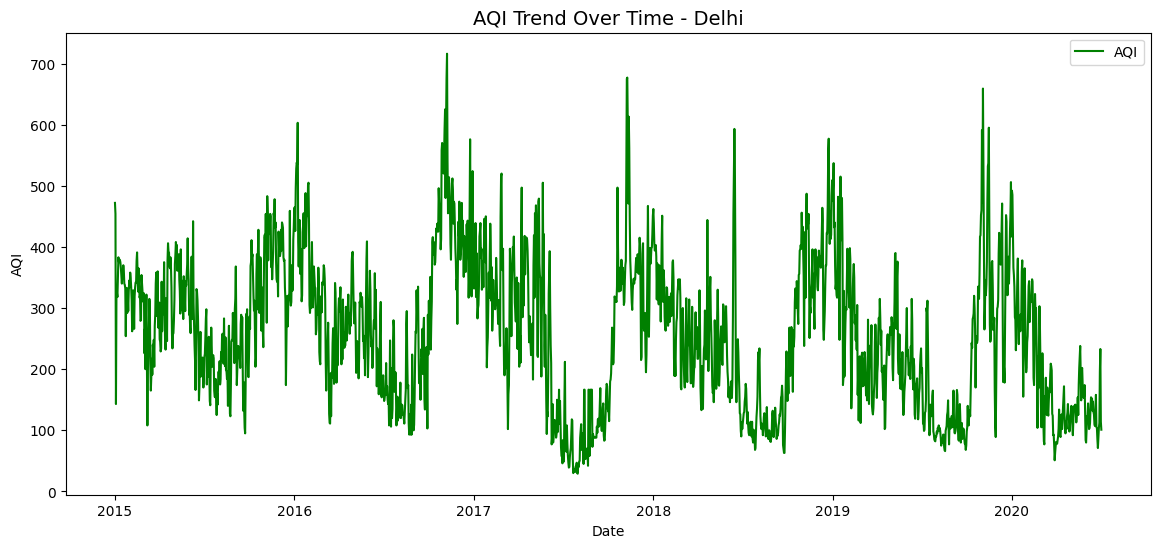

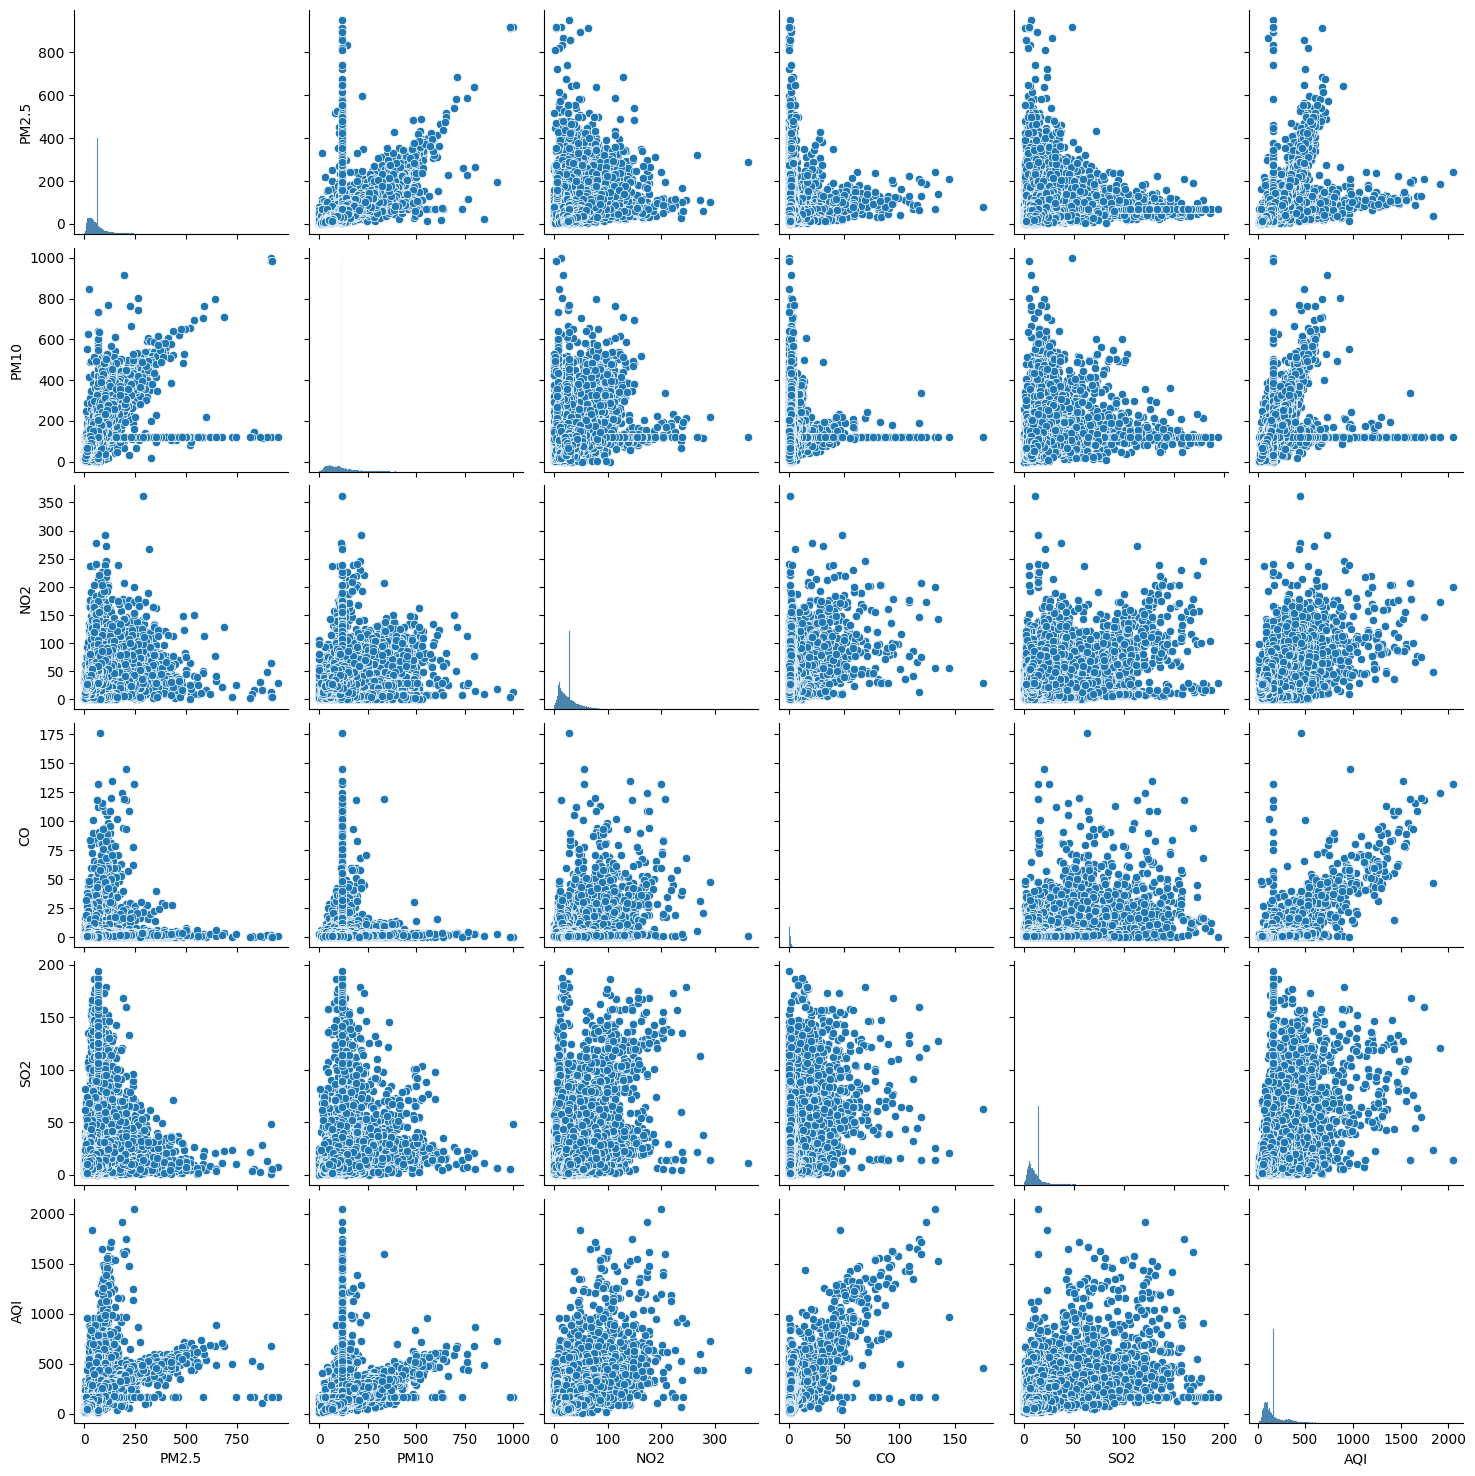

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cleaned_city_day.csv'  # Update with your file's path if needed
data = pd.read_csv(file_path)

# Basic Data Summary
print("First five rows:")
print(data.head())
print("\nSummary statistics:")
print(data.describe())
print("\nColumn data types:")
print(data.info())

# Handling Date column for time-series analysis
data['Date'] = pd.to_datetime(data['Date'])

# Example Analysis and Visualization

# 1. Distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(data['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI Values', fontsize=14)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of PM2.5 levels across cities
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='City', y='PM2.5', showfliers=False)
plt.xticks(rotation=90)
plt.title('PM2.5 Levels Across Cities', fontsize=14)
plt.xlabel('City')
plt.ylabel('PM2.5')
plt.show()

# 3. Correlation heatmap of numeric columns
plt.figure(figsize=(12, 8))
corr = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

# 4. Trend of AQI over time for a specific city
city_data = data[data['City'] == 'Delhi']  # Change city name as needed
plt.figure(figsize=(14, 6))
plt.plot(city_data['Date'], city_data['AQI'], label='AQI', color='green')
plt.title('AQI Trend Over Time - Delhi', fontsize=14)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

# 5. Pairplot of selected pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'AQI']
sns.pairplot(data[pollutants])
plt.show()


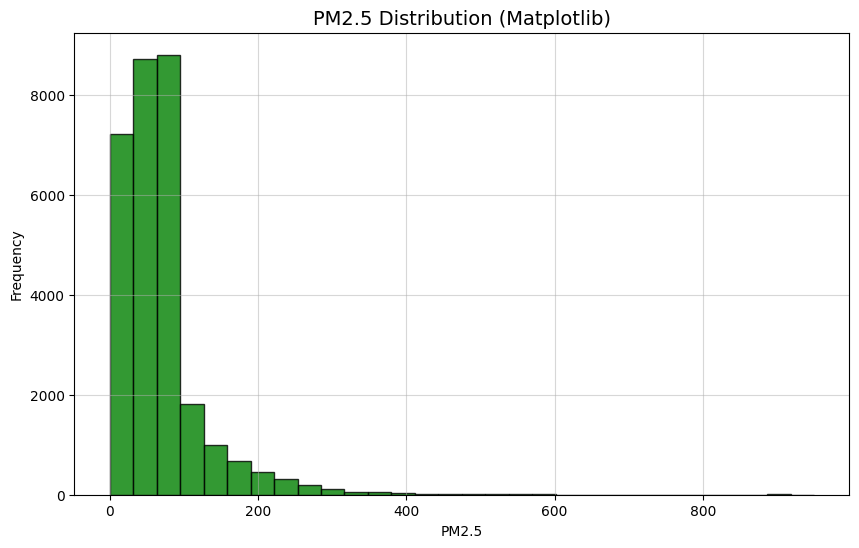

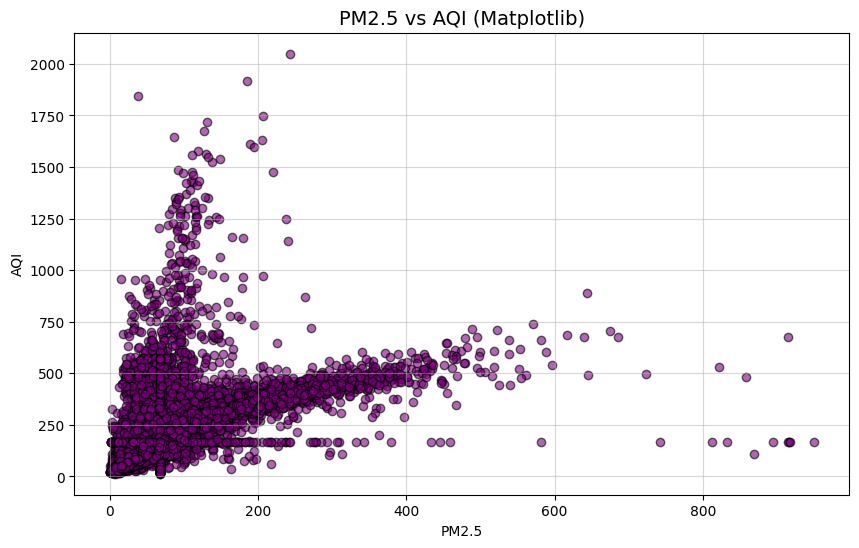

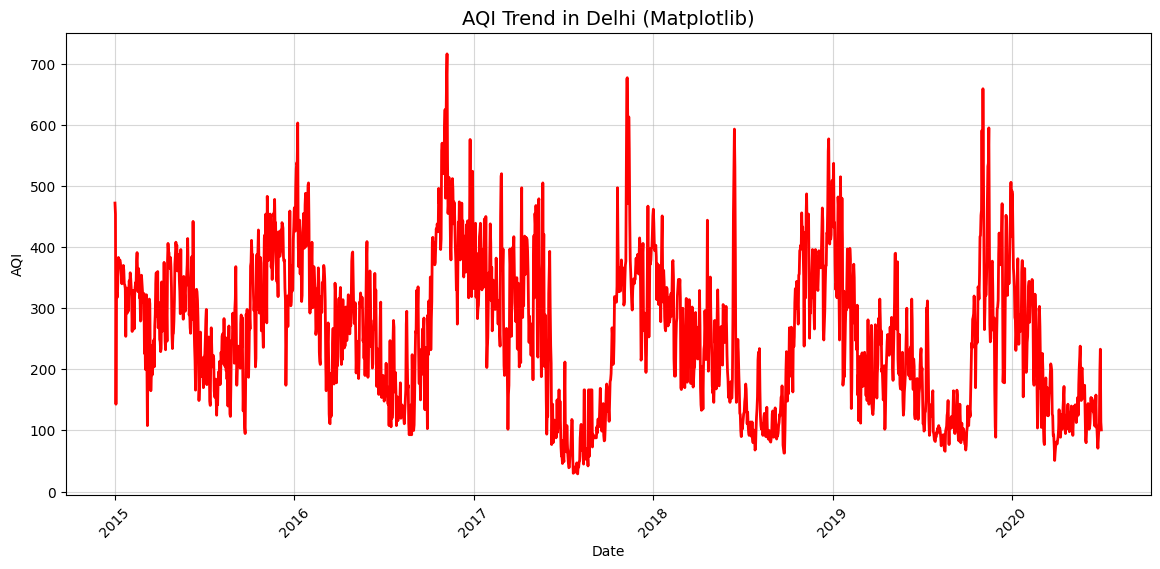

In [ ]:
# Histogram of PM2.5
plt.figure(figsize=(10, 6))
plt.hist(data['PM2.5'], bins=30, color='green', alpha=0.8, edgecolor='black')
plt.title('PM2.5 Distribution (Matplotlib)', fontsize=14)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.show()

# Scatter plot of PM2.5 vs AQI
plt.figure(figsize=(10, 6))
plt.scatter(data['PM2.5'], data['AQI'], color='purple', alpha=0.6, edgecolor='black')
plt.title('PM2.5 vs AQI (Matplotlib)', fontsize=14)
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.grid(alpha=0.5)
plt.show()

# Line plot of average AQI for a specific city
delhi_data = data[data['City'] == 'Delhi']
plt.figure(figsize=(14, 6))
plt.plot(delhi_data['Date'], delhi_data['AQI'], color='red', linewidth=2)
plt.title('AQI Trend in Delhi (Matplotlib)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()


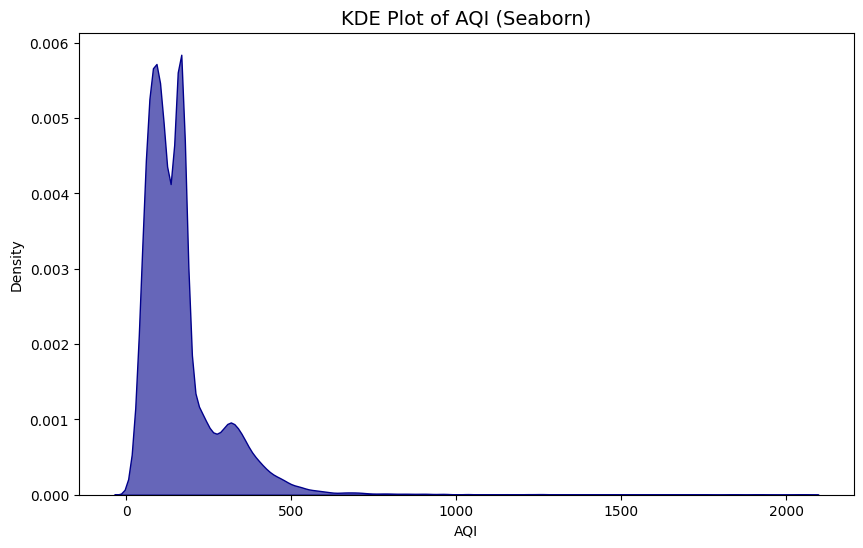

<ipython-input-22-5614a4f7272a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='City', y='PM2.5', showfliers=False, palette='viridis')


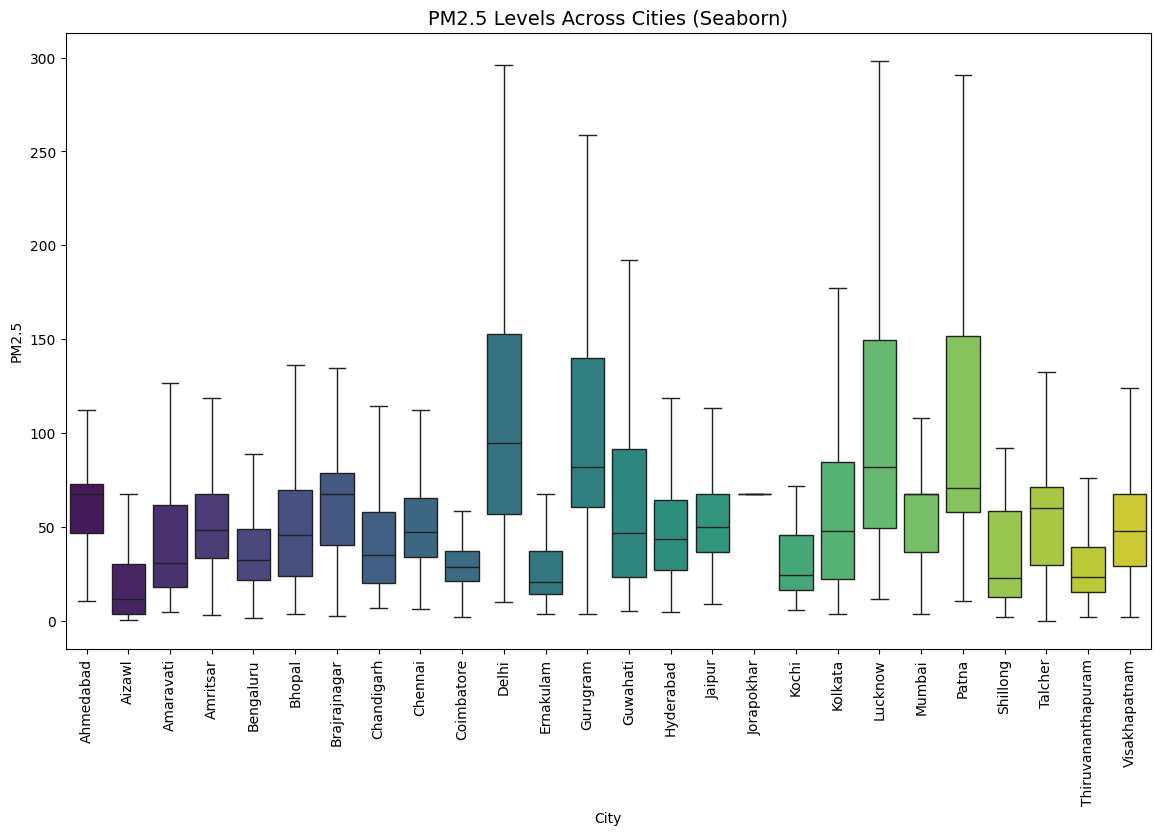

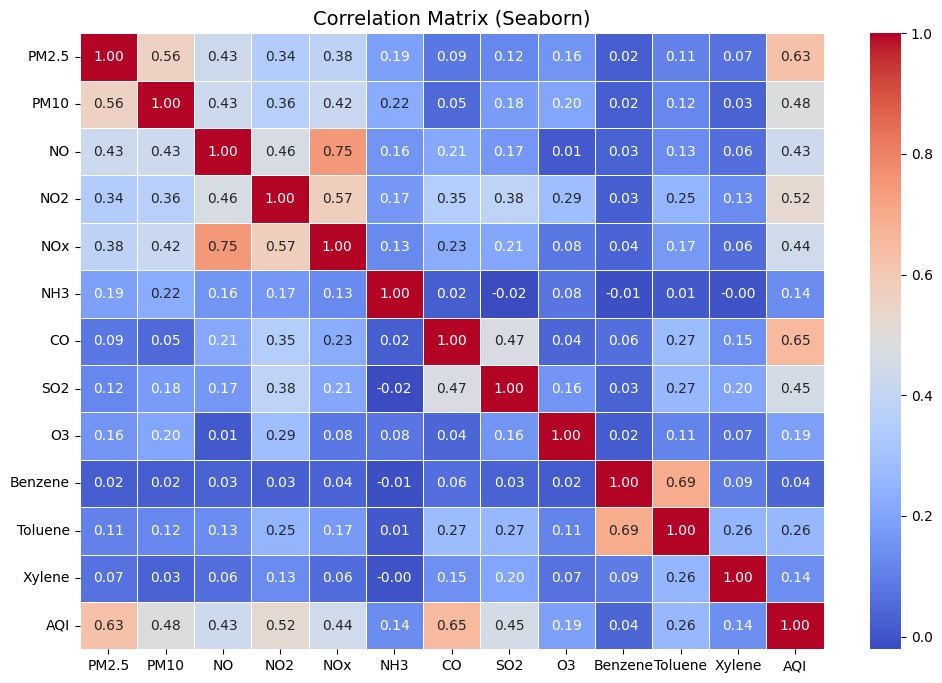

In [ ]:
import seaborn as sns

# KDE plot for AQI
plt.figure(figsize=(10, 6))
sns.kdeplot(data['AQI'], color='darkblue', fill=True, alpha=0.6)
plt.title('KDE Plot of AQI (Seaborn)', fontsize=14)
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()

# Boxplot of PM2.5 for different cities
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='City', y='PM2.5', showfliers=False, palette='viridis')
plt.xticks(rotation=90)
plt.title('PM2.5 Levels Across Cities (Seaborn)', fontsize=14)
plt.xlabel('City')
plt.ylabel('PM2.5')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Seaborn)', fontsize=14)
plt.show()


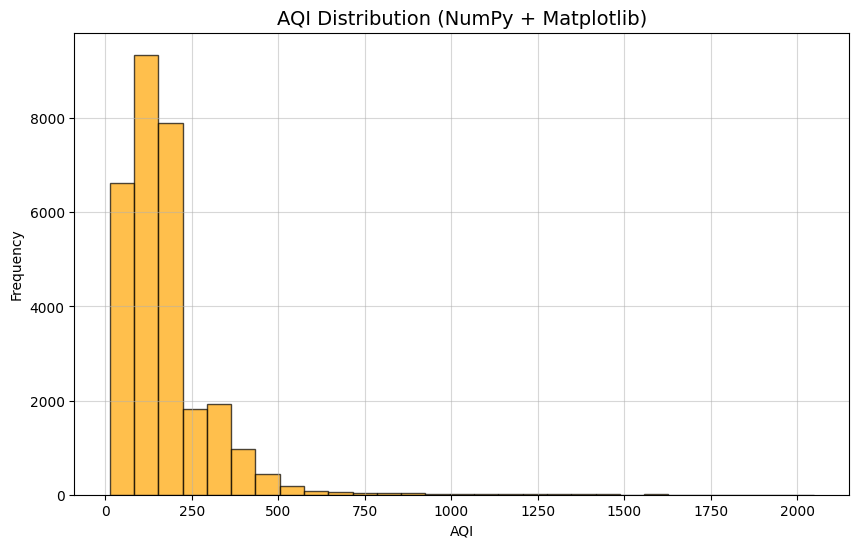

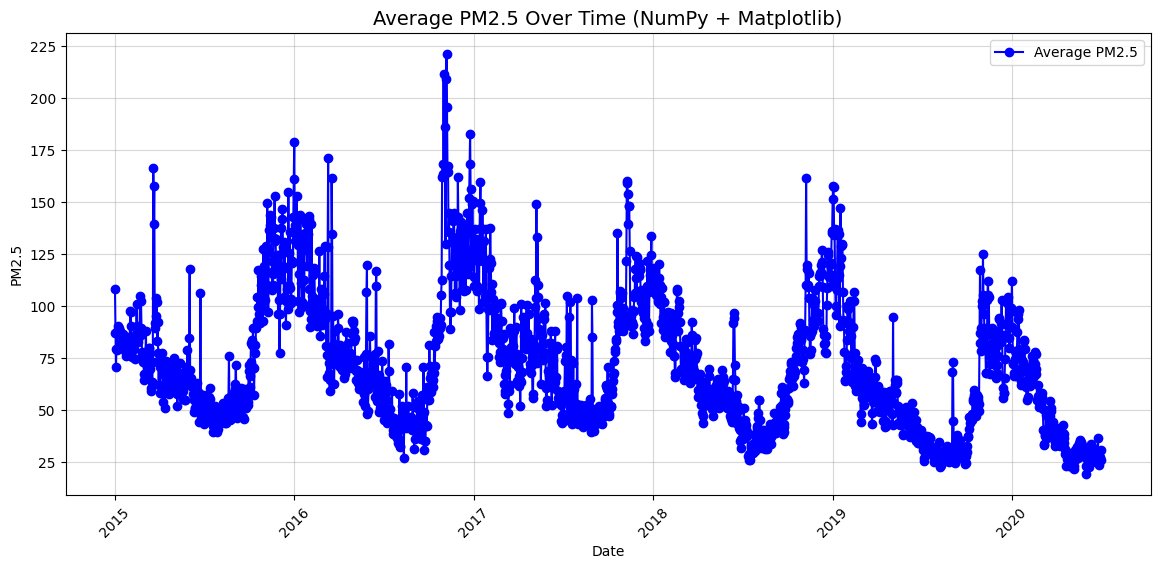

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Plot AQI distribution using NumPy and Matplotlib
aqi_values = data['AQI'].values

# Create bins for the histogram
bins = np.linspace(aqi_values.min(), aqi_values.max(), 30)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(aqi_values, bins=bins, color='orange', alpha=0.7, edgecolor='black')
plt.title('AQI Distribution (NumPy + Matplotlib)', fontsize=14)
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.show()

# Example: Line plot of average PM2.5 over time
average_pm25 = data.groupby('Date')['PM2.5'].mean().values
dates = pd.to_datetime(data['Date'].unique())

plt.figure(figsize=(14, 6))
plt.plot(dates, average_pm25, label='Average PM2.5', color='blue', marker='o')
plt.title('Average PM2.5 Over Time (NumPy + Matplotlib)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


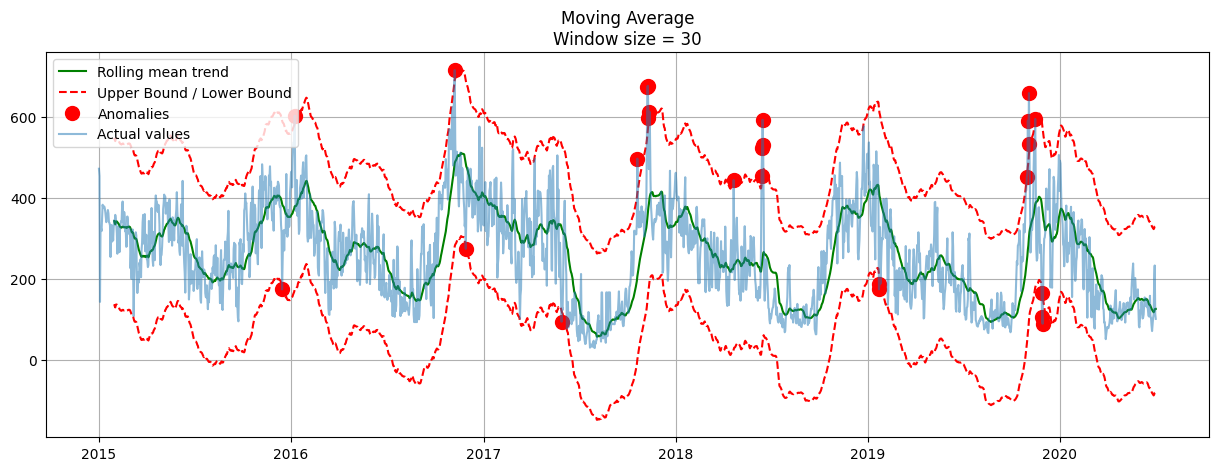

In [ ]:
## Moving Average


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load your dataset
file_path = 'cleaned_city_day.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format and sort by it
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Select a specific city and column for time-series analysis
city = 'Delhi'  # Replace with desired city
city_data = data[data['City'] == city]
series = city_data.set_index('Date')['AQI']

# Moving Average Function
def moving_average(series, n):
    """Calculate average of last n observations."""
    return np.average(series[-n:])

# Plot Moving Average
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    """
    series - dataframe with timeseries
    window - rolling window size
    plot_intervals - show confidence intervals
    plot_anomalies - show anomalies
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving Average\nWindow size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")

        # Mark anomalies
        if plot_anomalies:
            anomalies = series[(series < lower_bound) | (series > upper_bound)]
            plt.plot(anomalies, "ro", markersize=10, label="Anomalies")

    plt.plot(series, label="Actual values", alpha=0.5)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

# Use the function
window_size = 30  # Choose a rolling window size (e.g., 30 days)
plotMovingAverage(series, window=window_size, plot_intervals=True, plot_anomalies=True)


In [ ]:
## Xtrain _Y_Train

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare feature matrix (X) and target variable (y)
X = data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2']]  # Example features
y = data['AQI_Bucket']  # Target variable (classification labels)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (20671, 5) (20671,)
Testing data shape: (8860, 5) (8860,)


SVM and Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare feature matrix (X) and target variable (y)
X = data[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2']]  # Example features
y = data['AQI_Bucket']  # Target variable (classification labels)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
lor_model = LogisticRegression()
lor_model.fit(X_train, y_train)  # Train the Logistic Regression model

lor_pred = lor_model.predict(X_test)  # Make predictions

# Evaluate Logistic Regression
print("Logistic Regression Results:")
print(classification_report(y_test, lor_pred))
print("Accuracy:", accuracy_score(y_test, lor_pred))

# Support Vector Machine Model
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)  # Train the SVM model

svm_pred = svm_model.predict(X_test)  # Make predictions

# Evaluate SVM
print("\nSupport Vector Machine Results:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

        Good       0.74      0.12      0.21       402
    Moderate       0.75      0.86      0.80      4053
        Poor       0.59      0.29      0.39       834
Satisfactory       0.70      0.77      0.73      2468
      Severe       0.81      0.63      0.71       402
   Very Poor       0.69      0.70      0.70       701

    accuracy                           0.73      8860
   macro avg       0.71      0.56      0.59      8860
weighted avg       0.72      0.73      0.71      8860

Accuracy: 0.7265237020316027

Support Vector Machine Results:
              precision    recall  f1-score   support

        Good       0.76      0.10      0.18       402
    Moderate       0.82      0.82      0.82      4053
        Poor       0.68      0.53      0.59       834
Satisfactory       0.69      0.84      0.75      2468
      Severe       0.81      0.80      0.81       402
   Very Poor       0.73      0.74      0.

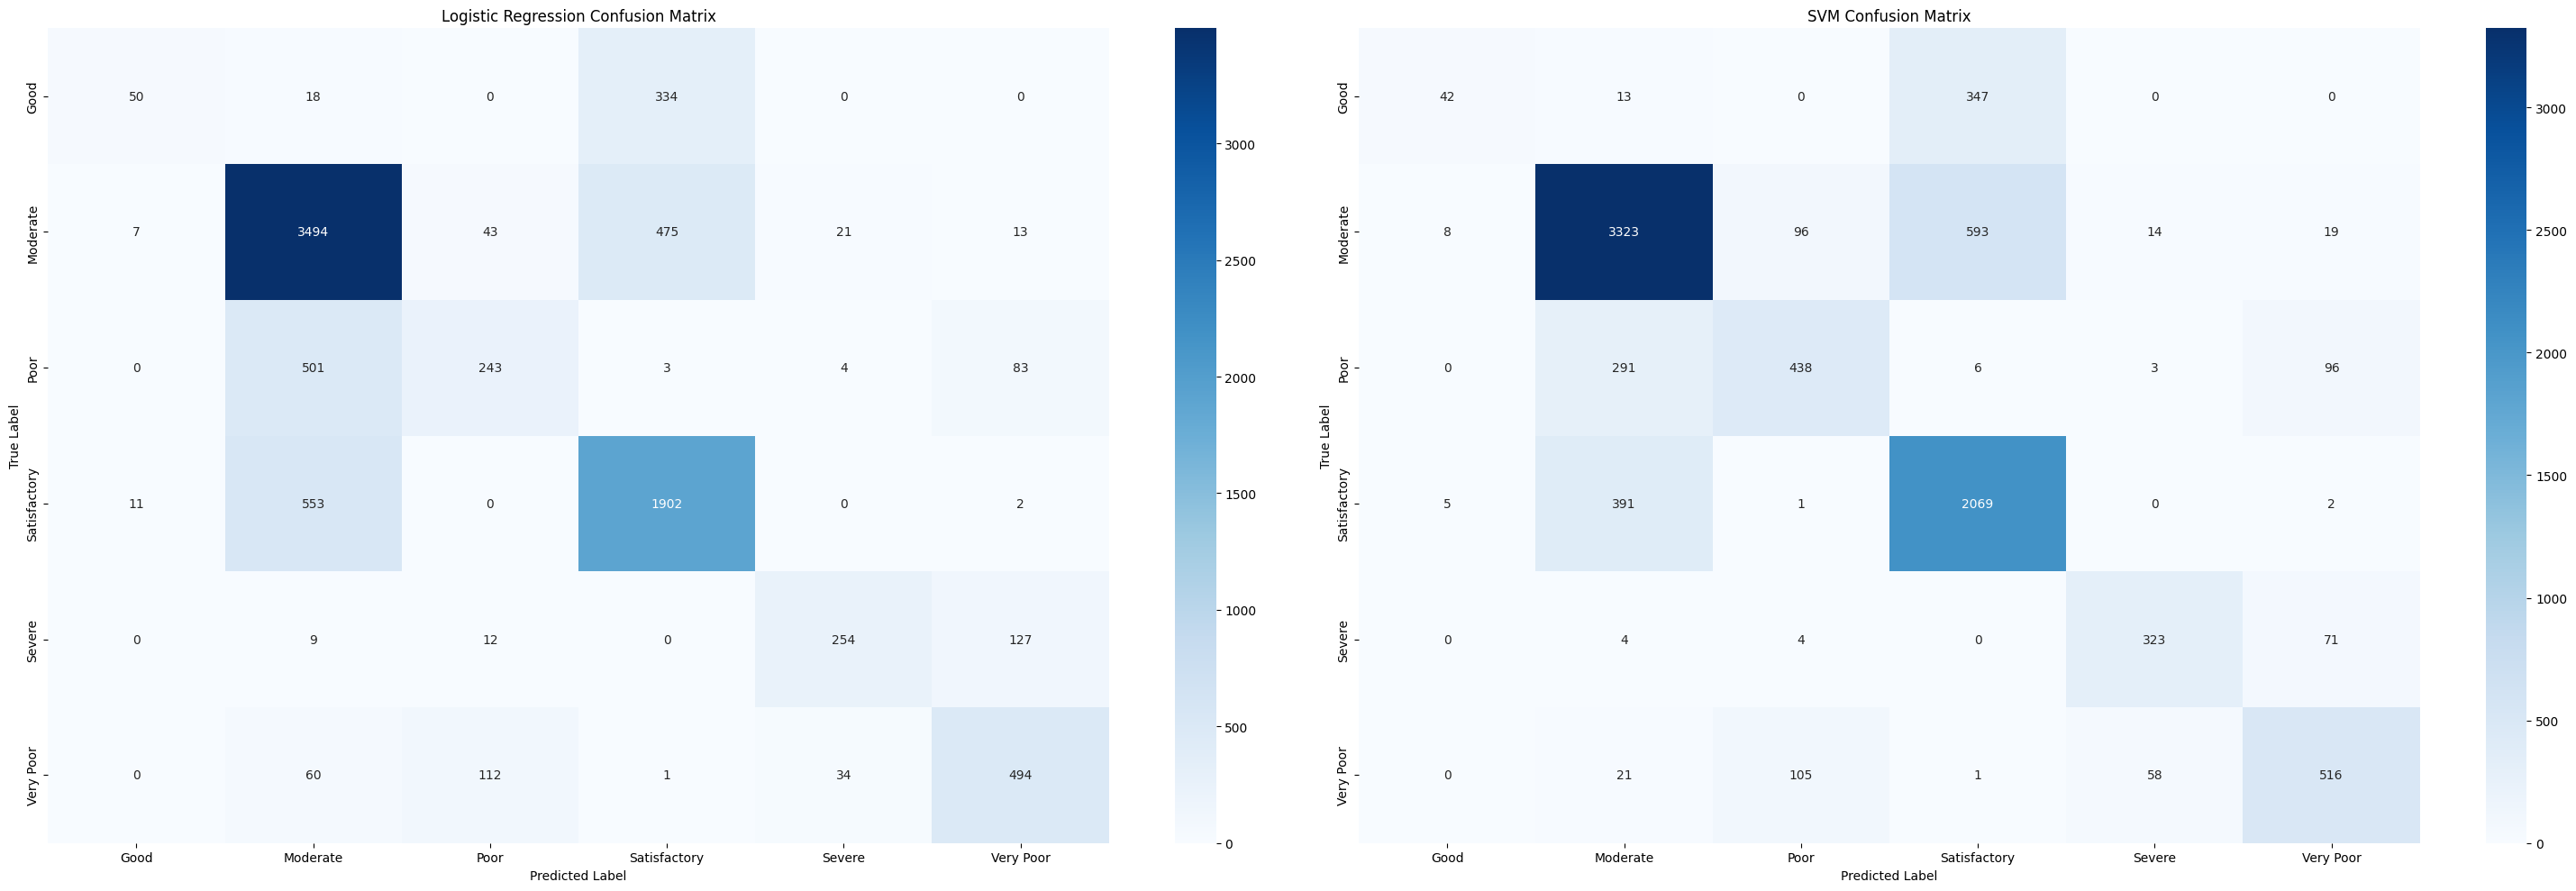

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrices for both models
lor_cm = confusion_matrix(y_test, lor_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

# Get class names (unique labels in the target variable)
class_names = np.unique(y_train)

# Plot confusion matrices
plt.figure(figsize=(30, 10))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(lor_cm, cmap='Blues', annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# SVM Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, cmap='Blues', annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
##Updated Code for Classification Metrics


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# Accuracy scores
lor_accuracy = accuracy_score(y_test, lor_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lor_pred))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Comparison DataFrame
metrics_dict = {
    "Metric": ["Accuracy"],
    "Logistic Regression": [lor_accuracy],
    "SVM": [svm_accuracy],
}
metrics = pd.DataFrame(metrics_dict)
print("\nModel Performance Comparison:")
print(metrics)



##Optional: Encoding String Labels to Numeric Values


from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
lor_pred_encoded = label_encoder.transform(lor_pred)
svm_pred_encoded = label_encoder.transform(svm_pred)

# Calculate regression metrics on encoded data
r2_svm = r2_score(y_test_encoded, svm_pred_encoded)
r2_lor = r2_score(y_test_encoded, lor_pred_encoded)

print("R2 Score (SVM):", r2_svm)
print("R2 Score (Logistic Regression):", r2_lor)










from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    accuracy_score,
    classification_report,
)
import pandas as pd

# Train Logistic Regression and SVM models (assuming already defined X_train, y_train, X_test, y_test)
lor_model = LogisticRegression()
lor_model.fit(X_train, y_train)
lor_pred = lor_model.predict(X_test)

svm_model = SVC(gamma="auto")
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Calculate Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# Calculate accuracy for Logistic Regression and SVM
lor_accuracy = accuracy_score(y_test, lor_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Generate classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lor_pred))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Create a comparison DataFrame
metrics_dict = {
    "Model": ["Logistic Regression", "SVM"],
    "Accuracy": [lor_accuracy, svm_accuracy],
}
metrics = pd.DataFrame(metrics_dict)
print("\nModel Performance Comparison:")
print(metrics)


# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
t_prediction = clf.predict(X_test)
t_acc = accuracy_score(y_test, t_prediction)
print("\nDecision Tree Accuracy on Test Data:", t_acc)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

r_acc = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy on Test Data:", r_acc)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       0.74      0.12      0.21       402
    Moderate       0.75      0.86      0.80      4053
        Poor       0.59      0.29      0.39       834
Satisfactory       0.70      0.77      0.73      2468
      Severe       0.81      0.63      0.71       402
   Very Poor       0.69      0.70      0.70       701

    accuracy                           0.73      8860
   macro avg       0.71      0.56      0.59      8860
weighted avg       0.72      0.73      0.71      8860


SVM Classification Report:
              precision    recall  f1-score   support

        Good       0.76      0.10      0.18       402
    Moderate       0.82      0.82      0.82      4053
        Poor       0.68      0.53      0.59       834
Satisfactory       0.69      0.84      0.75      2468
      Severe       0.81      0.80      0.81       402
   Very Poor       0.73      0.74      0.73       701

    a

Classification Report of Naive Bayes: 
              precision    recall  f1-score   support

        Good       0.49      0.20      0.28       402
    Moderate       0.79      0.68      0.73      4053
        Poor       0.55      0.37      0.44       834
Satisfactory       0.62      0.92      0.74      2468
      Severe       0.64      0.64      0.64       402
   Very Poor       0.68      0.61      0.64       701

    accuracy                           0.69      8860
   macro avg       0.63      0.57      0.58      8860
weighted avg       0.69      0.69      0.67      8860



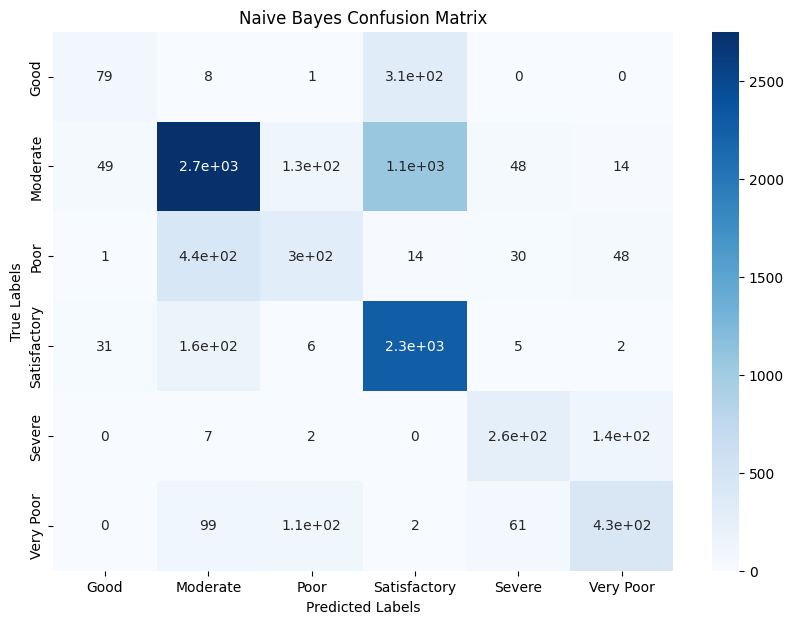


Updated Model Performance Comparison:
     Metric  Logistic Regression       SVM  Naive Bayes
0  Accuracy             0.726524  0.757449     0.685892


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test data
nb_pred = nb_model.predict(X_test)

# Evaluate the model with a classification report
print(f"Classification Report of Naive Bayes: \n{classification_report(y_test, nb_pred)}")

# Generate and display the confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(nb_cm, cmap="Blues", annot=True, xticklabels=class_names, yticklabels=class_names)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Update metrics comparison
metrics_dict = {
    "Metric": ["Accuracy"],
    "Logistic Regression": [accuracy_score(y_test, lor_pred)],
    "SVM": [accuracy_score(y_test, svm_pred)],
    "Naive Bayes": [accuracy_score(y_test, nb_pred)],
}
metrics = pd.DataFrame(metrics_dict)
print("\nUpdated Model Performance Comparison:")
print(metrics)


Classification Report of KNN: 
              precision    recall  f1-score   support

        Good       0.65      0.54      0.59       402
    Moderate       0.82      0.82      0.82      4053
        Poor       0.63      0.54      0.58       834
Satisfactory       0.74      0.79      0.76      2468
      Severe       0.80      0.80      0.80       402
   Very Poor       0.73      0.70      0.71       701

    accuracy                           0.76      8860
   macro avg       0.73      0.70      0.71      8860
weighted avg       0.76      0.76      0.76      8860



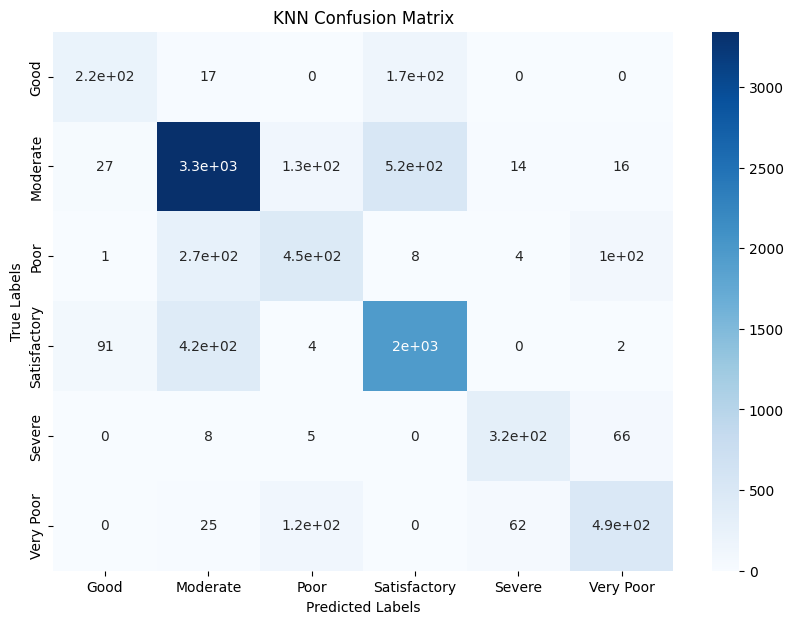


Updated Model Performance Comparison:
            Metric  Logistic Regression       SVM  Naive Bayes       KNN
Accuracy  Accuracy             0.726524  0.757449     0.685892  0.764786


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn_model.predict(X_test)

# Evaluate the model with a classification report
print(f"Classification Report of KNN: \n{classification_report(y_test, knn_pred)}")

# Generate and display the confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, cmap="Blues", annot=True, xticklabels=class_names, yticklabels=class_names)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Update metrics comparison
knn_accuracy = accuracy_score(y_test, knn_pred)
metrics_dict["KNN"] = [knn_accuracy]
metrics = pd.DataFrame(metrics_dict, index=["Accuracy"])
print("\nUpdated Model Performance Comparison:")
print(metrics)


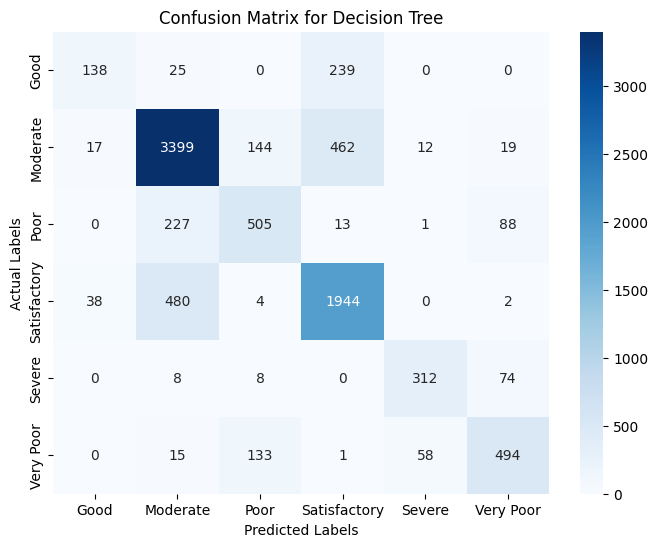

Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.34      0.46       402
    Moderate       0.82      0.84      0.83      4053
        Poor       0.64      0.61      0.62       834
Satisfactory       0.73      0.79      0.76      2468
      Severe       0.81      0.78      0.79       402
   Very Poor       0.73      0.70      0.72       701

    accuracy                           0.77      8860
   macro avg       0.74      0.68      0.70      8860
weighted avg       0.76      0.77      0.76      8860



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train_encoded)

# Predict on the test dataset
predictions_encoded = tree_clf.predict(X_test)

# Decode the predictions back to the original labels
predictions = label_encoder.inverse_transform(predictions_encoded)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report of AdaBoost: 
               precision    recall  f1-score   support

        Good       0.34      0.79      0.47       402
    Moderate       0.80      0.75      0.77      4053
        Poor       0.58      0.46      0.51       834
Satisfactory       0.70      0.64      0.67      2468
      Severe       0.64      0.19      0.29       402
   Very Poor       0.50      0.79      0.61       701

    accuracy                           0.67      8860
   macro avg       0.59      0.60      0.56      8860
weighted avg       0.70      0.67      0.67      8860

Confusion Matrix of AdaBoost: 
 [[ 317   13    0   72    0    0]
 [ 144 3023  182  612    8   84]
 [   1  265  385    7    3  173]
 [ 478  405    3 1578    0    4]
 [   0   23   14    0   76  289]
 [   0   34   79    1   32  555]]


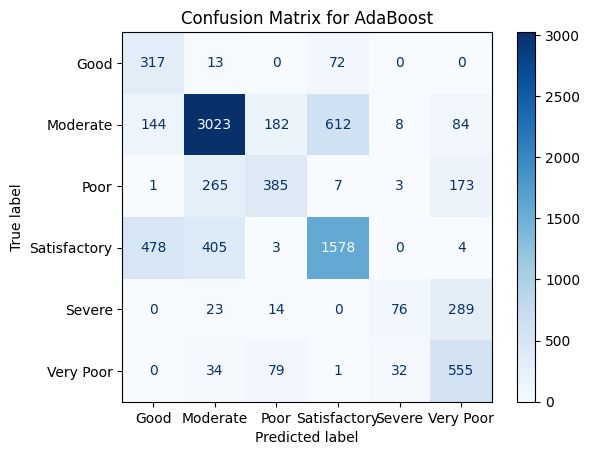

,Metric,Logistic Regression,SVM,Naive Bayes,KNN,AdaBoost
0,Accuracy,0.726524,0.757449,0.685892,0.764786,0.669752


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Initialize and train the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators
ada_model.fit(X_train, y_train)

# Make predictions
ada_pred = ada_model.predict(X_test)

# Evaluate the model
print(f"Classification Report of AdaBoost: \n {classification_report(y_test, ada_pred)}")

# Confusion Matrix
ada_cm = confusion_matrix(y_test, ada_pred)
print(f"Confusion Matrix of AdaBoost: \n {ada_cm}")

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=ada_cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for AdaBoost")
plt.show()

# Calculate and add AdaBoost classification metrics to the metrics dataframe
accuracy_ada = accuracy_score(y_test, ada_pred)

# Assuming metrics_dict is pre-defined to store other metrics
metrics_dict["AdaBoost"] = [accuracy_ada]  # Add more metrics as needed
metrics = pd.DataFrame(metrics_dict)
metrics


Classification Report of KNN: 
              precision    recall  f1-score   support

        Good       0.65      0.54      0.59       402
    Moderate       0.82      0.82      0.82      4053
        Poor       0.63      0.54      0.58       834
Satisfactory       0.74      0.79      0.76      2468
      Severe       0.80      0.80      0.80       402
   Very Poor       0.73      0.70      0.71       701

    accuracy                           0.76      8860
   macro avg       0.73      0.70      0.71      8860
weighted avg       0.76      0.76      0.76      8860



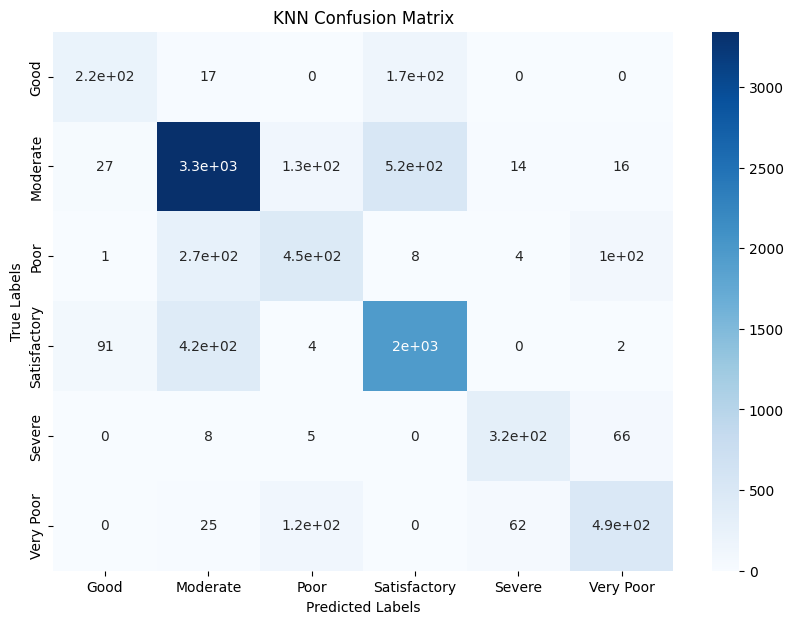


Updated Model Performance Comparison:
               KNN
Accuracy  0.764786


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report of Ensemble: 
              precision    recall  f1-score   support

        Good       0.77      0.31      0.44       402
    Moderate       0.82      0.83      0.83      4053
        Poor       0.68      0.52      0.59       834
Satisfactory       0.72      0.84      0.77      2468
      Severe       0.83      0.77      0.80       402
   Very Poor       0.73      0.74      0.74       701

    accuracy                           0.77      8860
   macro avg       0.76      0.67      0.69      8860
weighted avg       0.77      0.77      0.76      8860



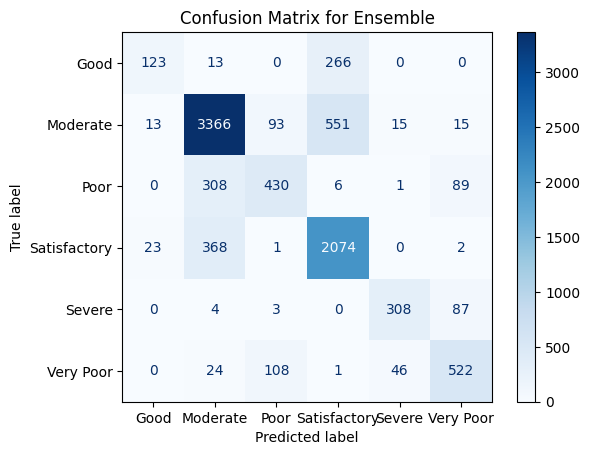


Updated Model Performance Comparison (Ensemble):
                KNN  Ensemble
Accuracy   0.764786  0.770090
Precision  0.764786  0.770845
Recall     0.764786  0.770090
F1-Score   0.764786  0.763377


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Assuming you have already preprocessed data: X_train, y_train, X_test, y_test, class_names

# Step 1: Train and evaluate KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
knn_model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
knn_pred = knn_model.predict(X_test)

# Print classification report for KNN model
print(f"Classification Report of KNN: \n{classification_report(y_test, knn_pred)}")

# Generate and plot confusion matrix for KNN model
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, cmap="Blues", annot=True, xticklabels=class_names, yticklabels=class_names)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Update metrics comparison dictionary for KNN model
knn_accuracy = accuracy_score(y_test, knn_pred)
metrics_dict = {"KNN": [knn_accuracy]}  # Initialize the dictionary
metrics = pd.DataFrame(metrics_dict, index=["Accuracy"])
print("\nUpdated Model Performance Comparison:")
print(metrics)

# Step 2: Define and train the best KNN model using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}  # Hyperparameter grid
knn_model = KNeighborsClassifier()  # Initialize KNN model
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')  # GridSearchCV to find the best KNN model
grid_search.fit(X_train, y_train)  # Fit the model

best_knn_model = grid_search.best_estimator_  # Select the best KNN model after GridSearch

# Step 3: Create the VotingClassifier with all models (including the best KNN)
voting_clf = VotingClassifier(estimators=[
    ('lr', lor_model),  # Logistic Regression model
    ('svm', svm_model),  # Support Vector Machine model
    ('rf', rfc),  # Random Forest Classifier model
    ('nb', nb_model),  # Naive Bayes model
    ('knn', best_knn_model),  # Best KNN model
    ('ada', ada_model),  # AdaBoost model
    ('tree', tree_clf)  # Decision Tree model
], voting='hard')  # 'hard' voting: majority class prediction

# Step 4: Train the ensemble VotingClassifier
voting_clf.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the ensemble model
voting_pred = voting_clf.predict(X_test)

# Print classification report for the ensemble model
print(f"Classification Report of Ensemble: \n{classification_report(y_test, voting_pred)}")

# Generate and plot confusion matrix for the ensemble model
voting_cm = confusion_matrix(y_test, voting_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voting_cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Ensemble")
plt.show()

# Step 6: Calculate performance metrics for the ensemble model
accuracy_voting = accuracy_score(y_test, voting_pred)
precision_voting = precision_score(y_test, voting_pred, average='weighted')  # Use 'weighted' for multi-class
recall_voting = recall_score(y_test, voting_pred, average='weighted')
f1_voting = f1_score(y_test, voting_pred, average='weighted')

# Update metrics dictionary with ensemble metrics
metrics_dict["Ensemble"] = [accuracy_voting, precision_voting, recall_voting, f1_voting]
metrics = pd.DataFrame(metrics_dict, index=["Accuracy", "Precision", "Recall", "F1-Score"])

# Print the updated metrics comparison
print("\nUpdated Model Performance Comparison (Ensemble):")
print(metrics)



Comparative Analysis:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

                         accuracy
Logistic Regression      0.726524
SVM                      0.757449
Random Forest            0.782393
Naive Bayes              0.685892
KNN                      0.776524
AdaBoost                 0.669752
Decision Tree (scratch)       0.0
Ensemble                  0.77009
Error calculating ROC AUC for Logistic Regression: multiclass format is not supported
Error calculating ROC AUC for SVM: multiclass format is not supported
Error calculating ROC AUC for Random Forest: multiclass format is not supported
Error calculating ROC AUC for Naive Bayes: multiclass format is not supported
Error calculating ROC AUC for KNN: multiclass format is not supported
Error calculating ROC AUC for AdaBoost: multiclass format is not supported
Error calculating ROC AUC for Decision Tree (scratch): multiclass format is not supported


Error calculating ROC AUC for Ensemble: multiclass format is not supported


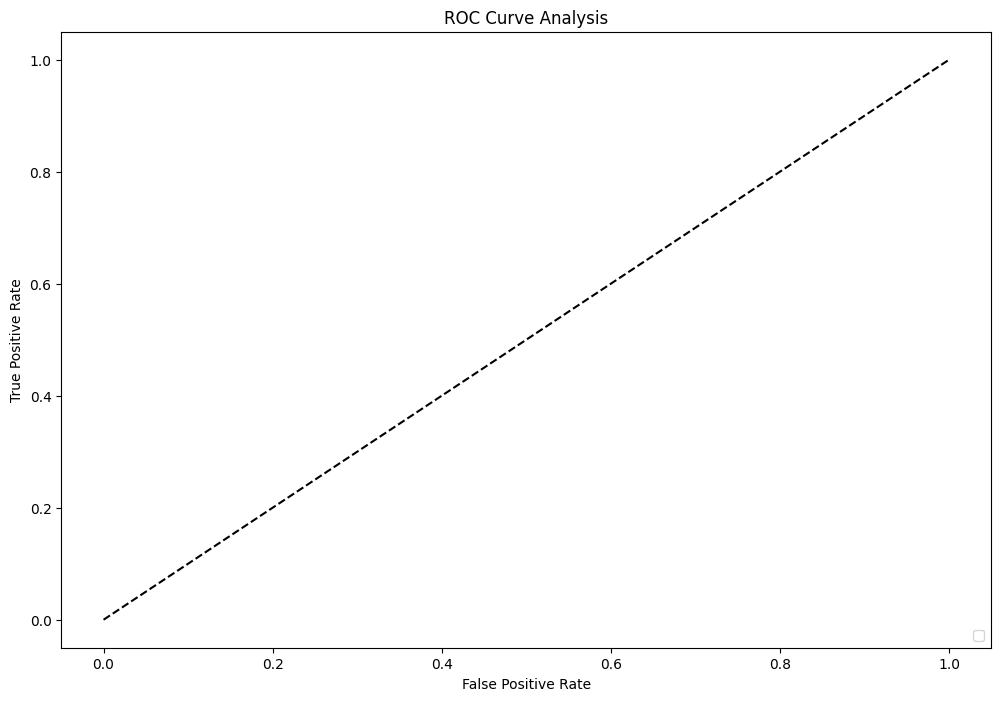


Conclusion:
Based on accuracy, the best performing model is: Random Forest
Error calculating AUC for Logistic Regression: multi_class must be in ('ovo', 'ovr')
Error calculating AUC for SVM: could not convert string to float: 'Very Poor'
Error calculating AUC for Random Forest: multi_class must be in ('ovo', 'ovr')
Error calculating AUC for Naive Bayes: multi_class must be in ('ovo', 'ovr')
Error calculating AUC for KNN: multi_class must be in ('ovo', 'ovr')
Error calculating AUC for AdaBoost: multi_class must be in ('ovo', 'ovr')
Error calculating AUC for Decision Tree (scratch): multi_class must be in ('ovo', 'ovr')
Error calculating AUC for Ensemble: could not convert string to float: 'Very Poor'

Further analysis, hyperparameter tuning, and feature engineering could potentially improve the performance of all models.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have trained models: lor_model, svm_model, rfc, nb_model, best_knn_model, ada_model, tree_clf, voting_clf and the necessary data (X_test, y_test)

# Models dictionary with the trained models
models = {
    "Logistic Regression": lor_model,
    "SVM": svm_model,
    "Random Forest": rfc,
    "Naive Bayes": nb_model,
    "KNN": best_knn_model,
    "AdaBoost": ada_model,
    "Decision Tree (scratch)": tree_clf,
    "Ensemble": voting_clf
}

print("\nComparative Analysis:")

# Initialize dictionary to store metrics for each model
metrics_summary = {}

# Loop through each model to evaluate it
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Ensure consistent label types (convert to string)
    y_test_str = [str(label) for label in y_test]
    y_pred_str = [str(label) for label in y_pred]

    # Get classification report
    report = classification_report(y_test_str, y_pred_str, output_dict=True)  # Get classification report
    metrics_summary[model_name] = report

# Convert metrics to DataFrame for easier visualization
metrics_df = pd.DataFrame(metrics_summary).transpose()

# Check if the desired columns exist in the metrics dataframe
desired_columns = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
available_columns = [col for col in desired_columns if col in metrics_df.columns]

# Display the selected metrics
print(metrics_df[available_columns])  # Display metrics like accuracy, precision, recall, f1-score

# ROC Curve Analysis
plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    try:
        # For models with predict_proba method (works with binary classification)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
        else:
            # For models without predict_proba, use predicted labels (not ideal for ROC curve)
            y_pred_proba = model.predict(X_test)

        # Calculate ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test_str, y_pred_proba)
        roc_auc = roc_auc_score(y_test_str, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    except Exception as e:
        print(f"Error calculating ROC AUC for {model_name}: {e}")

# Plot diagonal line for random model (no discrimination)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc='lower right')
plt.show()

# Conclusion: Identify the best performing model based on accuracy
print("\nConclusion:")
best_model = max(metrics_summary, key=lambda k: metrics_summary[k]['accuracy'])
print(f"Based on accuracy, the best performing model is: {best_model}")

# Print AUC for each model
for model_name, model in models.items():
    try:
        # For models with predict_proba
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
        else:
            y_pred_proba = model.predict(X_test)  # Use predicted labels if no predict_proba method

        # Calculate AUC score
        roc_auc = roc_auc_score(y_test_str, y_pred_proba)
        print(f"{model_name}: AUC = {roc_auc:.2f}")
    except Exception as e:
        print(f"Error calculating AUC for {model_name}: {e}")

print("\nFurther analysis, hyperparameter tuning, and feature engineering could potentially improve the performance of all models.")


In [ ]:
# If X_train has 5 features, create a sample input with 5 features
sample_input = np.array([[3.4, 2.5, 1.7, 4.1, 0.3]])  # Example input: 5 features for a single sample

# Now you can predict using the models
sample_prediction_lr = lor_model.predict(sample_input)
print(f"Prediction using Logistic Regression: {sample_prediction_lr}")

sample_prediction_svm = svm_model.predict(sample_input)
print(f"Prediction using SVM: {sample_prediction_svm}")

sample_prediction_rf = rfc.predict(sample_input)
print(f"Prediction using Random Forest: {sample_prediction_rf}")

sample_prediction_knn = best_knn_model.predict(sample_input)
print(f"Prediction using KNN: {sample_prediction_knn}")

sample_prediction_ada = ada_model.predict(sample_input)
print(f"Prediction using AdaBoost: {sample_prediction_ada}")

sample_prediction_tree = tree_clf.predict(sample_input)
print(f"Prediction using Decision Tree: {sample_prediction_tree}")

sample_prediction_ensemble = voting_clf.predict(sample_input)
print(f"Prediction using Ensemble model: {sample_prediction_ensemble}")


Prediction using Logistic Regression: ['Severe']
Prediction using SVM: ['Severe']
Prediction using Random Forest: ['Severe']
Prediction using KNN: ['Very Poor']
Prediction using AdaBoost: ['Very Poor']
Prediction using Decision Tree: [4]
Prediction using Ensemble model: ['Severe']
